In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [3]:
hdat = pd.read_csv("../history.csv")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [4]:
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()
hdat["Age"] = hdat["AS_OF"] - hdat["DATE_OF_INTEREST"]

In [5]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41


In [6]:
hdat["Days"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [7]:
firstRpt = hdat[["DATE_OF_INTEREST", "NEW_COVID_CASE_COUNT"]].groupby("DATE_OF_INTEREST").first()
firstRpt.rename(columns={"NEW_COVID_CASE_COUNT": "First"}, inplace=True)
hdat = hdat.merge(firstRpt, how="left", on="DATE_OF_INTEREST")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8


In [8]:
lastRpt = hdat[["DATE_OF_INTEREST", "NEW_COVID_CASE_COUNT"]].groupby("DATE_OF_INTEREST").last()
lastRpt.rename(columns={"NEW_COVID_CASE_COUNT": "Last"}, inplace=True)
hdat = hdat.merge(lastRpt, how="left", on="DATE_OF_INTEREST")
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7


In [9]:
hdat

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last
0,2020-03-02,2020-03-26 11:26:41,1.000000,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1
1,2020-03-03,2020-03-26 11:26:41,1.500000,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1
2,2020-03-04,2020-03-26 11:26:41,4.000000,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5
3,2020-03-05,2020-03-26 11:26:41,3.250000,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3
4,2020-03-06,2020-03-26 11:26:41,4.200000,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2020-04-16,2020-04-21 12:57:29,3248.142857,251.0,370.285714,458.0,745.571429,2460,4,5 days 12:57:29,26,2460
1024,2020-04-17,2020-04-21 12:57:29,2958.571429,223.0,340.857143,383.0,659.428571,2155,3,4 days 12:57:29,38,2155
1025,2020-04-18,2020-04-21 12:57:29,2575.714286,178.0,305.857143,150.0,572.285714,808,2,3 days 12:57:29,23,808
1026,2020-04-19,2020-04-21 12:57:29,2254.142857,90.0,258.285714,14.0,467.428571,358,1,2 days 12:57:29,8,358


In [10]:
hdat["Growth"] = hdat["Last"]/hdat["NEW_COVID_CASE_COUNT"]
hdat["Age (days)"] = hdat["Age"].dt.days

In [11]:
df = hdat.pivot_table(index="Age (days)",
                 columns="DATE_OF_INTEREST",
                 values="Growth")

In [12]:
df

DATE_OF_INTEREST,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
Age (days),,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174.400000,28.358696,107.464286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.707152,5.207585,45.590909,144.692308,94.911765,94.615385,56.710526,35.130435,44.75,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.542274,4.642349,3.775408,74.651301,4.268519,3.280000,3.848214,2.143236,1.00,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.505747,2.477683,2.707148,2.032415,1.808857,1.563891,1.551476,1.000000,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.004598,2.188259,1.359079,1.349839,1.175592,1.167537,1.000000,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.726852,1.282694,1.111563,1.148001,1.070315,1.000000,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.120463,1.087083,1.080431,1.049080,1.000000,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.061796,1.031633,1.011769,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.024677,1.003462,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


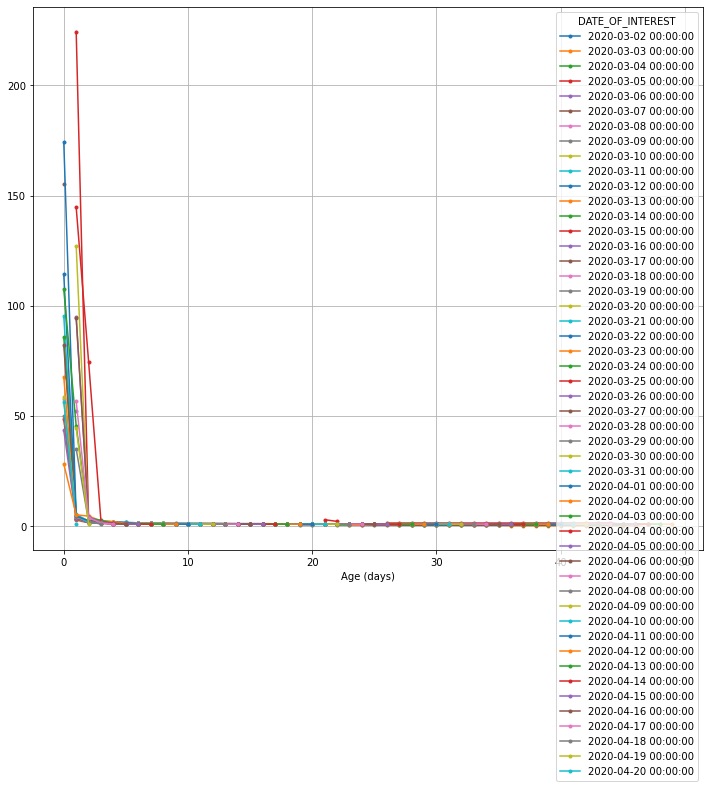

In [13]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot(style=".-", ax=ax)

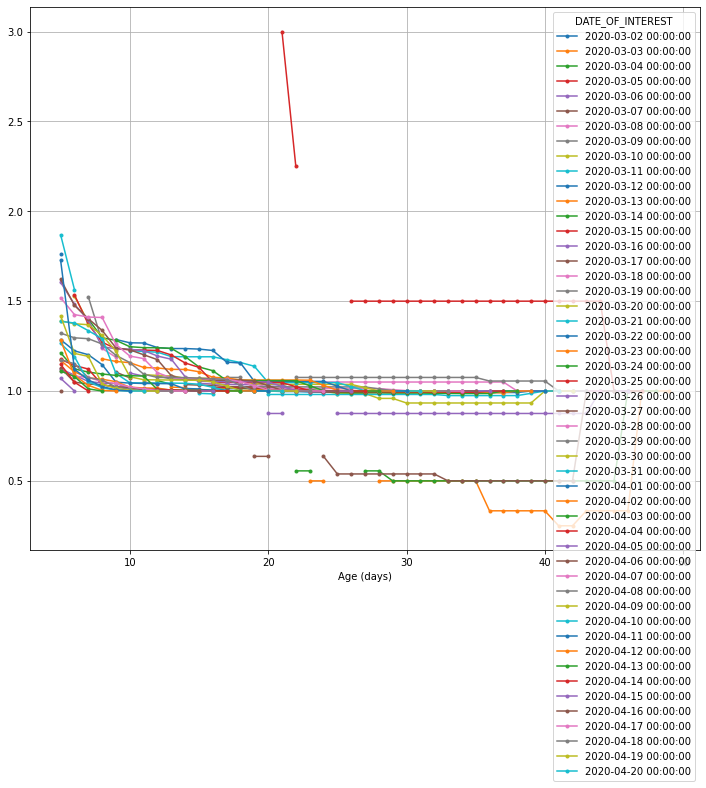

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
df[df.index >= 5].plot(style=".-", ax=ax)

In [15]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last,Growth,Age (days)
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1,1.000000,24
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1,0.500000,23
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5,0.555556,22
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3,3.000000,21
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7,0.875000,20


In [16]:
hdat.head(50)

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last,Growth,Age (days)
0,2020-03-02,2020-03-26 11:26:41,1.000000,NaN,NaN,NaN,NaN,1,0,24 days 11:26:41,1,1,1.000000,24
1,2020-03-03,2020-03-26 11:26:41,1.500000,NaN,NaN,3.0,3.000000,2,0,23 days 11:26:41,2,1,0.500000,23
2,2020-03-04,2020-03-26 11:26:41,4.000000,NaN,NaN,3.0,3.000000,9,0,22 days 11:26:41,9,5,0.555556,22
3,2020-03-05,2020-03-26 11:26:41,3.250000,NaN,NaN,4.0,3.333333,1,0,21 days 11:26:41,1,3,3.000000,21
4,2020-03-06,2020-03-26 11:26:41,4.200000,NaN,NaN,5.0,3.750000,8,0,20 days 11:26:41,8,7,0.875000,20
5,2020-03-07,2020-03-26 11:26:41,5.333333,NaN,NaN,9.0,4.800000,11,0,19 days 11:26:41,11,7,0.636364,19
6,2020-03-08,2020-03-26 11:26:41,7.428571,NaN,NaN,13.0,6.166667,20,0,18 days 11:26:41,20,21,1.050000,18
7,2020-03-09,2020-03-26 11:26:41,14.857143,NaN,NaN,25.0,8.857143,53,0,17 days 11:26:41,53,57,1.075472,17
8,2020-03-10,2020-03-26 11:26:41,24.428571,NaN,NaN,42.0,14.428571,69,0,16 days 11:26:41,69,70,1.014493,16
9,2020-03-11,2020-03-26 11:26:41,45.285714,NaN,NaN,53.0,21.571429,155,0,15 days 11:26:41,155,153,0.987097,15


In [17]:
peak = hdat.groupby("AS_OF").max()
peak.rename(columns={"Cases/day, 7 day avg": "Cases/day, 7 day avg, Peak", "NEW_COVID_CASE_COUNT": "NEW_COVID_CASE_COUNT, Peak"},
            inplace=True)
hdat = hdat.merge(peak[["Cases/day, 7 day avg, Peak", "NEW_COVID_CASE_COUNT, Peak"]], on="AS_OF")

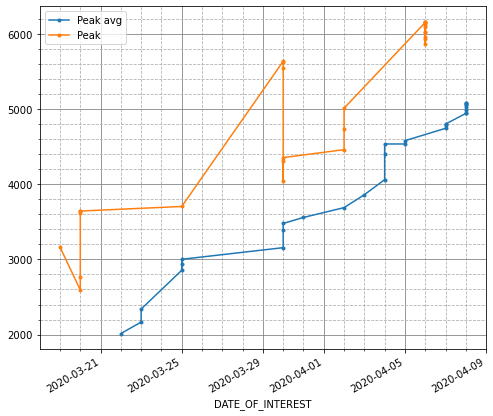

In [18]:
fig, ax = plt.subplots(figsize=(8,7))
peakavg = hdat[hdat["Cases/day, 7 day avg"] == hdat["Cases/day, 7 day avg, Peak"]]
peakavg.set_index("DATE_OF_INTEREST")[["Cases/day, 7 day avg, Peak"]].plot(style=".-", ax=ax)

peak = hdat[hdat["NEW_COVID_CASE_COUNT"] == hdat["NEW_COVID_CASE_COUNT, Peak"]]
peak.set_index("DATE_OF_INTEREST")[["NEW_COVID_CASE_COUNT, Peak"]].plot(style=".-", ax=ax)

ax.legend(["Peak avg", "Peak"])
plt.minorticks_on()
plt.grid(True, which="minor", linestyle="--")
plt.grid(True, which="major", color="0.5")

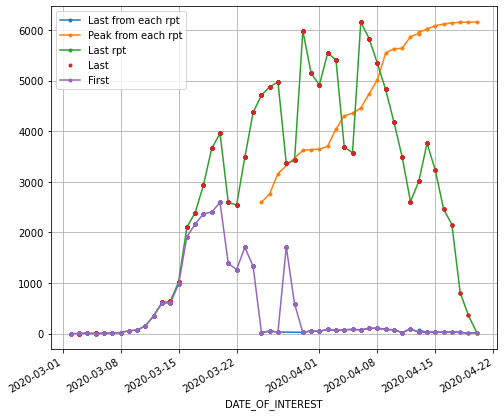

In [19]:
fig, ax = plt.subplots(figsize=(8,7))
hdat.groupby("AS_OF").last().set_index("DATE_OF_INTEREST")[["NEW_COVID_CASE_COUNT"]].plot(style=".-", ax=ax)
hdat.groupby("AS_OF").max().set_index("DATE_OF_INTEREST")[["NEW_COVID_CASE_COUNT"]].plot(style=".-", ax=ax)
hdat[hdat["AS_OF"] == np.max(hdat["AS_OF"])].set_index("DATE_OF_INTEREST")[["NEW_COVID_CASE_COUNT"]].plot(style=".-", ax=ax)
hdat.set_index("DATE_OF_INTEREST")[["Last"]].plot(style=".", ax=ax)
hdat.set_index("DATE_OF_INTEREST")[["First"]].plot(style=".-", ax=ax)

ax.legend(["Last from each rpt", "Peak from each rpt", "Last rpt", "Last", "First"])

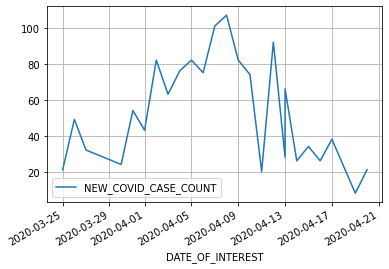

In [20]:
hdat.groupby("AS_OF").last().set_index("DATE_OF_INTEREST")[["NEW_COVID_CASE_COUNT"]].plot()

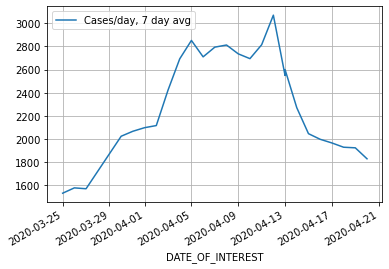

In [21]:
hdat.groupby("AS_OF").last().set_index("DATE_OF_INTEREST")[["Cases/day, 7 day avg"]].plot()

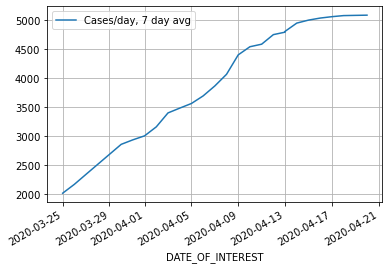

In [22]:
hdat.groupby("AS_OF").max().set_index("DATE_OF_INTEREST")[["Cases/day, 7 day avg"]].plot()

In [23]:
hdat.groupby("AS_OF").max()

,DATE_OF_INTEREST,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days,Age,First,Last,Growth,Age (days),"Cases/day, 7 day avg, Peak","NEW_COVID_CASE_COUNT, Peak"
AS_OF,,,,,,,,,,,,,,,
2020-03-26 11:26:41,2020-03-25,2013.714286,53.0,34.142857,492.0,398.142857,2594,0,24 days 11:26:41,2594,4711,224.333333,24,2013.714286,2594
2020-03-27 10:03:51,2020-03-26,2166.428571,68.0,44.142857,575.0,474.857143,2765,1,25 days 10:03:51,2594,4879,99.571429,25,2166.428571,2765
2020-03-27 18:37:24,2020-03-27,2339.571429,75.0,52.285714,598.0,490.428571,3164,2,25 days 18:37:24,2594,4973,155.406250,25,2339.571429,3164
2020-03-31 09:25:56,2020-03-30,2855.285714,122.0,100.000000,702.0,636.285714,3622,3,29 days 09:25:56,2594,5987,249.458333,29,2855.285714,3622
2020-03-31 17:21:32,2020-03-31,2933.142857,136.0,115.857143,769.0,679.857143,3639,4,29 days 17:21:32,2594,5987,95.333333,29,2933.142857,3639
2020-04-01 17:31:00,2020-04-01,3001.857143,161.0,141.571429,791.0,741.142857,3644,5,30 days 17:31:00,2594,5987,114.302326,30,3001.857143,3644
2020-04-02 18:09:06,2020-04-02,3156.714286,180.0,156.571429,820.0,764.142857,3705,6,31 days 18:09:06,2594,5987,67.646341,31,3156.714286,3705
2020-04-03 18:15:27,2020-04-03,3396.714286,204.0,179.857143,896.0,814.857143,4042,7,32 days 18:15:27,2594,5987,85.936508,32,3396.714286,4042
2020-04-04 18:32:26,2020-04-04,3479.142857,254.0,207.142857,925.0,835.285714,4305,8,33 days 18:32:26,2594,5987,48.539474,33,3479.142857,4305
